<a href="https://colab.research.google.com/github/janprince/ml_mobile_price_pred/blob/main/Apple_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

## Importing Data

In [34]:
import pandas as pd

data = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1138233600&period2=1650931200&interval=1d&events=history&includeAdjustedClose=true")

## Exploratory Data Analysis

### Numerical EDA

In [35]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-26,2.661786,2.693929,2.568929,2.583214,2.211940,1181387200
1,2006-01-27,2.605357,2.628571,2.539286,2.572500,2.202765,953864800
2,2006-01-30,2.541786,2.735714,2.531071,2.678571,2.293591,1398401200
3,2006-01-31,2.696429,2.726429,2.633929,2.696786,2.309188,913542000
4,2006-02-01,2.676786,2.730714,2.665714,2.693571,2.306436,521186400


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4085,2022-04-19,165.020004,167.820007,163.910004,167.399994,167.399994,67723800
4086,2022-04-20,168.759995,168.880005,166.100006,167.229996,167.229996,67929800
4087,2022-04-21,168.910004,171.529999,165.910004,166.419998,166.419998,87227800
4088,2022-04-22,166.460007,167.869995,161.500000,161.789993,161.789993,84775200
4089,2022-04-25,161.119995,163.169998,158.460007,162.880005,162.880005,96046400


In [38]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4.090000e+03
mean,35.810824,36.195078,35.427702,35.826658,34.355608,4.151857e+08
std,40.985785,41.465507,40.519372,41.014072,41.228086,3.899430e+08
min,1.847500,1.888929,1.791429,1.809643,1.549551,4.100000e+07
25%,7.540268,7.599643,7.446250,7.523750,6.442393,1.245816e+08
50%,22.376964,22.609108,22.232322,22.398214,19.361634,2.773608e+08
75%,43.009376,43.358125,42.600000,42.996251,41.346450,5.940270e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,3.372970e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4090 non-null   object 
 1   Open       4090 non-null   float64
 2   High       4090 non-null   float64
 3   Low        4090 non-null   float64
 4   Close      4090 non-null   float64
 5   Adj Close  4090 non-null   float64
 6   Volume     4090 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 223.8+ KB


In [ ]:
data.shape

(4090, 7)

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [36]:
# date format
# df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

# set 'date' as index
data = data.set_index("Date")


In [ ]:
data = data[3700:]
data

### Visual EDA

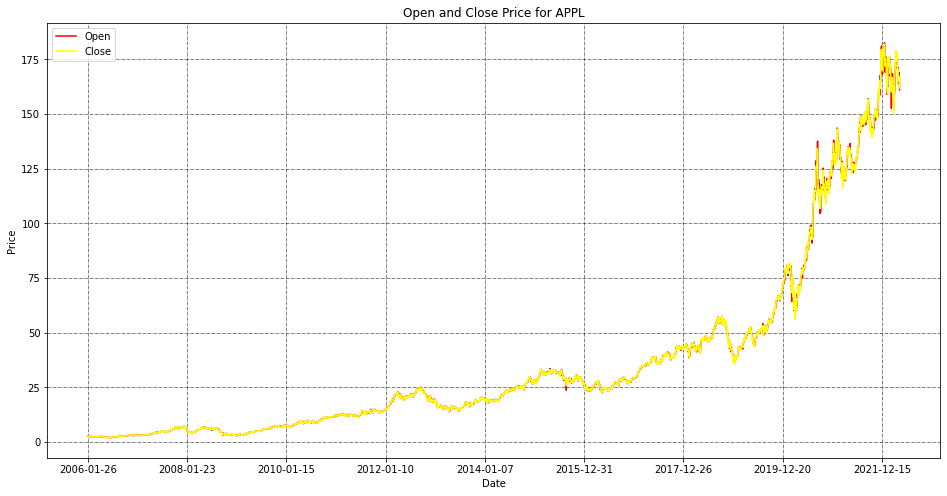

In [45]:
import matplotlib
import matplotlib.pyplot as plt

data['Open'].plot( figsize=(16, 8), c="red")
data['Close'].plot(c='yellow')

# Define the label for the title of the figure
plt.title("Open and Close Price for APPL")

# Define labels for x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show legends
plt.legend()

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

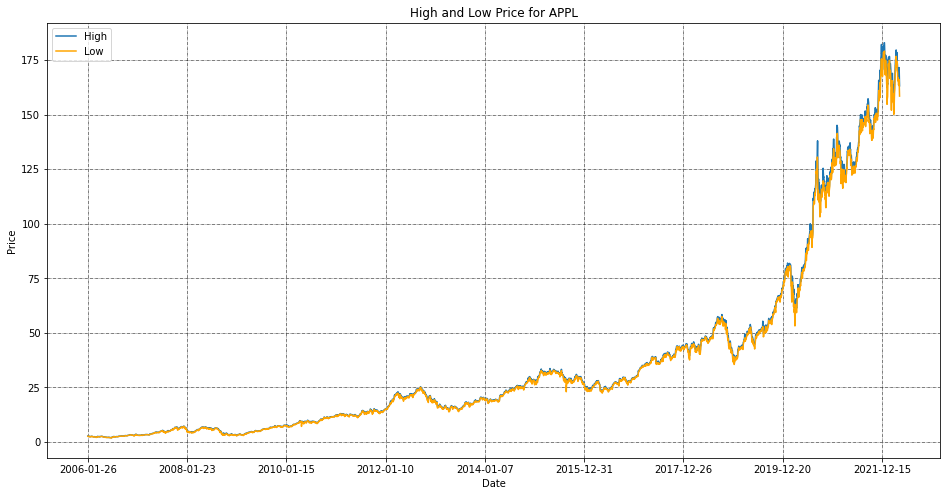

In [48]:
import matplotlib
import matplotlib.pyplot as plt

data['High'].plot( figsize=(16, 8))
data['Low'].plot(c="orange")

# Define the label for the title of the figure
plt.title("High and Low Price for APPL")

# Define labels for x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("Price")

# Show legends
plt.legend()

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

## Preparing data for training

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop(['Close', 'Volume', 'Adj Close'], axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.shape

(4090, 3)

## Training a Linear Model

In [43]:
from sklearn.linear_model import LinearRegression

r = LinearRegression()

r.fit(X_train, y_train)

r.score(X_train, y_train)

0.9999111575722497

### Cross-validation for performance evaluation

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(r, X_train, y_train, cv=5)

scores

array([0.99989853, 0.99992684, 0.9999007 , 0.99990113, 0.99991992])